# Associação e Agrupamento em Tarefas de Mineração de Dados

As técnicas de associação e agrupamento são fundamentais na análise de grandes conjuntos de dados, especialmente em áreas como ``mineração de dados`` e aprendizado de máquina.

A técnica de associação é usada para descobrir relações frequentes entre itens em um conjunto de dados. Isso é especialmente útil em análises de transações, como compras de clientes em uma loja online. Por exemplo, a técnica de associação pode ser usada para identificar padrões de compra, como produtos que geralmente são comprados juntos, ou produtos que são frequentemente comprados após um determinado evento, como um feriado ou promoção.

Já as técnicas de agrupamento são usadas para segmentar um conjunto de dados em grupos, com base em alguma medida de similaridade. Essa técnica é usada em diversos campos, como marketing, pesquisa de mercado, análise de imagem, entre outros. Por exemplo, é possível usar a técnica de agrupamento para segmentar clientes com base em seus comportamentos de compra ou para agrupar imagens com base em suas características visuais.

Ambas as técnicas permitem a identificação de padrões e insights em grandes conjuntos de dados que seriam difíceis ou impossíveis de serem descobertos por meio de análises manuais. Além disso, elas podem ser usadas para prever comportamentos futuros com base em padrões passados e para auxiliar na tomada de decisões.

## ``Associação``
A Associação é uma tarefa de Mineração de Dados que busca descobrir associações frequentes entre um conjunto de itens em um grande conjunto de dados transacionais. Em outras palavras, a associação identifica relações entre diferentes itens que costumam ocorrer juntos em uma transação.

A Associação é frequentemente usada em marketing, análise de vendas, análise de padrões de consumo, entre outros. Alguns dos algoritmos mais comuns usados para realizar a tarefa de Associação incluem o algoritmo Apriori e o algoritmo FP-Growth.

#### Exemplo de Associação em Tarefas de Mineração de Dados

Um exemplo de Associação em Tarefas de Mineração de Dados é a identificação de padrões de consumo de clientes em uma loja de varejo. O objetivo seria encontrar associações entre diferentes produtos comprados por um cliente e identificar quais produtos tendem a ser comprados juntos.

O conjunto de dados seria composto por transações de vendas realizadas em diferentes momentos. Cada transação seria composta por uma lista de itens comprados por um cliente. O modelo seria treinado usando algoritmos de mineração de dados de associação, como o algoritmo Apriori, que identifica associações frequentes entre itens.

Após o treinamento, o modelo seria capaz de identificar quais produtos tendem a ser comprados juntos com alta frequência e quais produtos têm menos associações entre si. Essas informações podem ser úteis para a loja de varejo para decidir como organizar os produtos nas prateleiras e planejar promoções e ofertas especiais para incentivar a compra de produtos relacionados. Além disso, a loja pode usar essas informações para criar pacotes de produtos que incentivem os clientes a comprar mais itens juntos.

#### Outro exemplo de Associação em Tarefas de Mineração de Dados
Já reparou que em algumas lojas on-line, quando visita algum produto, em alguma parte da página, geralmente no final, temos uma aba semelhante a "Pessoas que compraram este produto também compraram estes..."

## ``Regras de Associação``
Um dos métodos de avaliar se as associações são boas ou não, é a identificação de regras fortes nas bases de dados. Para isto, precisamos conhecer os seguintes termos:


- **Suporte**: o suporte é a frequência absoluta de uma regra em um conjunto de transações. Em outras palavras, o suporte mede a proporção de transações no conjunto que contêm todos os itens da regra. Quanto maior o suporte, mais frequente é a regra no conjunto de dados. (Ex Regra: Cliente que compra cebola compra batata)

- **Confiança**: a confiança mede a proporção de transações que contêm todos os itens da regra entre as transações que contêm o antecedente da regra. Em outras palavras, a confiança mede a probabilidade de o consequente aparecer em uma transação que já contém o antecedente. Quanto maior a confiança, mais forte é a associação entre o antecedente e o consequente.(Qual a confiança de que o cliente que comprou cebola (antecedente é comprar cebola) também irá comprar batata (Comprar batata é o consequente))

- **Lift**: o lift é uma medida de quão fortemente os itens do antecedente e do consequente estão associados, em relação à sua frequência esperada se fossem independentes. O lift mede a proporção entre a confiança da regra e a frequência do consequente. Se o lift for maior que 1, indica que os itens do antecedente e do consequente estão associados de forma positiva, enquanto um lift menor que 1 indica que eles estão associados de forma negativa. Um lift igual a 1 indica independência entre os itens.

**Ex**:

Suponha que estamos analisando um conjunto de transações que contém compras em um supermercado. Aqui está um exemplo de como calcular o suporte, a confiança e o lift para uma regra de associação simples:

Regra: {cerveja} -> {amendoim}

quem compra cerveja (antecedente) também compra amendoim (consequente)

Nesta base de dados fictícia temos:
100 transações
40 transações possuem compra de cerveja
30 transações possuem compra de amendoim
20 transações possuem compra de cerveja e amendoim

**Suporte**: o suporte da regra é a proporção de transações que contêm cerveja e amendoim. Em um total de 100 transações, 20 delas possuem cerveja e amendoim. O suporte seria, portanto, de 20/100 ou 0,2 (20%).

**Confiança**: a confiança da regra mede a proporção de transações que contêm cerveja e amendoim entre as transações que contêm cerveja. Com o total de 40 transações que contêm cerveja, 20 delas também contêm amendoim. A confiança seria, portanto, de 20/40 ou 0,5 (50%).

**Lift**: o lift da regra mede a força da associação entre cerveja e amendoim, comparado com o que seria esperado se eles fossem independentes. O lift é calculado dividindo a confiança da regra pelo suporte do consequente (quantidade de transações com amendoim dividido pela quantidade de transações totais - 30/100 = 0,3 ou 30%). No nosso exemplo, o lift seria (0,5 / (0.3)) = 1,66.

Uma interpretação possível dos resultados seria: a regra {cerveja} -> {amendoim} é relativamente comum, aparecendo em 20% das transações. A confiança de 0,5 indica que quando um cliente compra cerveja, há uma probabilidade de 50% de que ele também compre amendoim. O lift de 1,66 indica que a associação entre as duas variáveis é positiva e que há um efeito sinérgico entre elas.



In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importar bibliotecas
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
# Leitura da base de dados
df = pd.read_csv('compras.csv')

#### Breve análise exploratória da base de dados
Inclui:
- Ver as primiras linhas para ter noção do que a base representa;
- Informações da base de dados
- Quantidade de valores nulos
- Informações descritivas da base de dados

In [ ]:
# Exibir as 3 primeiras linhas da base de dados
df.head(3)

,id_cliente,id_compra,nome_item,quantidade,valor,data,pais
0,17850,536365,arroz,6,2.55,2010-01-12,Reino Unido
1,17850,536366,arroz,6,1.85,2010-01-12,Reino Unido
2,13047,536367,arroz,32,1.69,2010-01-12,Reino Unido


In [ ]:
# Informação da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188537 entries, 0 to 188536
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_cliente  188537 non-null  int64  
 1   id_compra   188537 non-null  int64  
 2   nome_item   188537 non-null  object 
 3   quantidade  188537 non-null  int64  
 4   valor       188537 non-null  float64
 5   data        188537 non-null  object 
 6   pais        188537 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 10.1+ MB


In [ ]:
# Quantidade de valores núlos por coluna
df.isna().sum()

id_cliente    0
id_compra     0
nome_item     0
quantidade    0
valor         0
data          0
pais          0
dtype: int64

In [ ]:
# Informações descritivas dos valores numéricos
df.describe()

,id_cliente,id_compra,quantidade,valor
count,188537.000000,188537.000000,188537.000000,188537.000000
mean,15302.218000,560620.725285,15.587635,3.284238
std,1727.999108,12913.544383,259.942344,29.285097
min,12346.000000,536365.000000,1.000000,0.000000
25%,13849.000000,549561.000000,2.000000,1.250000
50%,15249.000000,561488.000000,6.000000,1.950000
75%,16814.000000,572050.000000,12.000000,3.750000
max,18287.000000,581587.000000,80995.000000,8142.750000


In [ ]:
# Informações descritivas dos valores textuais
df.describe(include='O')

,nome_item,data,pais
count,188537,188537,188537
unique,41,305,29
top,arroz,2011-05-12,Reino Unido
freq,12321,1447,172278


#### Aplicação do algorítmo

In [ ]:
# Transformar o dataframe em uma lista de transações
# Agrupa os itens das mesmas compras
transactions = df.groupby(['id_compra'])['nome_item'].apply(list).values.tolist()

# Forma uma lista de listas
transactions[-1]

['arroz', 'chá', 'macarrão', 'sal', 'chuchu', 'frango', 'tomate']

In [ ]:
transactions

[['arroz'],
 ['arroz'],
 ['arroz'],
 ['arroz'],
 ['arroz'],
 ['arroz'],
 ['arroz'],
 ['arroz'],
 ['arroz'],
 ['arroz'],
 ['arroz'],
 ['arroz'],
 ['arroz'],
 ['arroz'],
 ['arroz'],
 ['arroz', 'feijão'],
 ['arroz', 'feijão'],
 ['feijão'],
 ['feijão', 'arroz'],
 ['feijão', 'arroz'],
 ['feijão', 'arroz'],
 ['arroz', 'feijão'],
 ['feijão', 'arroz'],
 ['feijão', 'arroz'],
 ['feijão', 'arroz'],
 ['feijão'],
 ['feijão', 'arroz', 'macarrão'],
 ['macarrão', 'arroz', 'feijão'],
 ['arroz', 'feijão', 'macarrão'],
 ['macarrão', 'feijão'],
 ['macarrão', 'arroz', 'feijão'],
 ['arroz'],
 ['feijão'],
 ['macarrão', 'arroz', 'feijão'],
 ['arroz', 'feijão', 'macarrão'],
 ['macarrão', 'arroz'],
 ['macarrão', 'arroz', 'feijão', 'óleo'],
 ['óleo'],
 ['arroz', 'macarrão'],
 ['arroz'],
 ['óleo', 'feijão', 'arroz', 'macarrão'],
 ['óleo', 'macarrão', 'feijão', 'arroz'],
 ['óleo', 'macarrão', 'arroz', 'feijão', 'sal'],
 ['sal', 'feijão', 'óleo', 'arroz', 'macarrão'],
 ['sal', 'óleo', 'macarrão', 'arroz'],
 ['feijã

In [ ]:
# Criar uma instância do objeto TransactionEncoder
te = TransactionEncoder()

# Codificar as transações em um formato de matriz binária
te_ary = te.fit(transactions).transform(transactions)

# Criar um dataframe com a matriz binária codificada
transactions_df = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
transactions_df.tail(2)

,abobrinha,alface,alho,arroz,açúcar,batata,berinjela,beterraba,biscoito,bolo,...,pimentão,presunto,pão,queijo,quiabo,sal,salsa,tomate,torrada,óleo
18161,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
18162,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [ ]:
df.tail(11)

,id_cliente,id_compra,nome_item,quantidade,valor,data,pais
188526,13113,581586,bolo,8,2.95,2011-09-12,Reino Unido
188527,13113,581586,beterraba,24,1.25,2011-09-12,Reino Unido
188528,13113,581586,manteiga,24,8.95,2011-09-12,Reino Unido
188529,13113,581586,óleo,10,7.08,2011-09-12,Reino Unido
188530,12680,581587,arroz,12,1.95,2011-09-12,França
188531,12680,581587,chá,12,1.65,2011-09-12,França
188532,12680,581587,macarrão,4,3.75,2011-09-12,França
188533,12680,581587,sal,8,1.95,2011-09-12,França
188534,12680,581587,chuchu,4,4.15,2011-09-12,França
188535,12680,581587,frango,12,0.85,2011-09-12,França


In [ ]:
# Aplicar o algoritmo Apriori
frequent_itemsets_apriori = apriori(transactions_df, min_support=0.3, use_colnames=True)

# Aplicar as regras de associação
rules = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1)

# Mostrar as regras de associação e suas métricas
print("Regras de associação:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Regras de associação:
            antecedents         consequents   support  confidence      lift
0             (açúcar)             (arroz)  0.324451    0.795814  1.173149
1              (arroz)            (açúcar)  0.324451    0.478289  1.173149
2               (café)             (arroz)  0.339041    0.820083  1.208925
3              (arroz)              (café)  0.339041    0.499797  1.208925
4                (chá)             (arroz)  0.339536    0.825127  1.216361
5              (arroz)               (chá)  0.339536    0.500528  1.216361
6             (feijão)             (arroz)  0.478555    0.809386  1.193157
7              (arroz)            (feijão)  0.478555    0.705462  1.193157
8           (macarrão)             (arroz)  0.422287    0.845365  1.246195
9              (arroz)          (macarrão)  0.422287    0.622514  1.246195
10          (manteiga)             (arroz)  0.316798    0.840368  1.238828
11             (arroz)          (manteiga)  0.316798    0.467008  1.238828
12

Vamos fazer os cálculos da regra feijão e óleo então arroz

#### Suporte
Suporte registros que possuem açúcaro e arroz / pela quantidade de compras

In [ ]:
# Identificadores das compras que possuem feijão
id_acucar = list(df.loc[df['nome_item'] == 'açúcar'].id_compra)
# Identificadores das compras que possuem óleo
id_arroz = list(df.loc[df['nome_item'] == 'arroz'].id_compra)

In [ ]:
# Retorna as compras com arroz
df.loc[df['nome_item'] == 'arroz']

,id_cliente,id_compra,nome_item,quantidade,valor,data,pais
0,17850,536365,arroz,6,2.55,2010-01-12,Reino Unido
1,17850,536366,arroz,6,1.85,2010-01-12,Reino Unido
2,13047,536367,arroz,32,1.69,2010-01-12,Reino Unido
3,13047,536368,arroz,6,4.25,2010-01-12,Reino Unido
4,13047,536369,arroz,3,5.95,2010-01-12,Reino Unido
...,...,...,...,...,...,...,...
188454,12713,581578,arroz,3,18.00,2011-09-12,Alemanha
188476,17581,581579,arroz,10,1.79,2011-09-12,Reino Unido
188508,13777,581583,arroz,40,1.45,2011-09-12,Reino Unido
188517,15804,581585,arroz,16,1.69,2011-09-12,Reino Unido


In [ ]:
# Retorna o id_compra das compras com arroz
df.loc[df['nome_item'] == 'arroz'].id_compra

0         536365
1         536366
2         536367
3         536368
4         536369
           ...  
188454    581578
188476    581579
188508    581583
188517    581585
188530    581587
Name: id_compra, Length: 12321, dtype: int64

In [ ]:
# Retorna uma lista com o id_compra das compras com arroz
list(df.loc[df['nome_item'] == 'arroz'].id_compra)

[536365,
 536366,
 536367,
 536368,
 536369,
 536370,
 536371,
 536372,
 536373,
 536374,
 536375,
 536376,
 536377,
 536378,
 536380,
 536381,
 536382,
 536385,
 536386,
 536387,
 536388,
 536389,
 536390,
 536392,
 536394,
 536395,
 536396,
 536398,
 536399,
 536401,
 536402,
 536403,
 536404,
 536406,
 536407,
 536408,
 536409,
 536412,
 536415,
 536416,
 536423,
 536425,
 536460,
 536464,
 536466,
 536477,
 536488,
 536500,
 536502,
 536514,
 536520,
 536522,
 536525,
 536526,
 536527,
 536528,
 536529,
 536530,
 536531,
 536532,
 536536,
 536538,
 536539,
 536542,
 536551,
 536557,
 536560,
 536561,
 536562,
 536566,
 536569,
 536571,
 536572,
 536574,
 536575,
 536576,
 536577,
 536578,
 536582,
 536584,
 536586,
 536587,
 536588,
 536590,
 536591,
 536594,
 536595,
 536597,
 536599,
 536600,
 536601,
 536602,
 536603,
 536604,
 536607,
 536609,
 536610,
 536611,
 536612,
 536613,
 536614,
 536615,
 536618,
 536619,
 536620,
 536621,
 536623,
 536624,
 536627,
 536628,
 536629,
 

In [ ]:
#Filtro para deixar somente os registros com os identificadores de compras nas listas a cima
df_calcula_suporte = df.loc[(df.id_compra.isin(id_acucar))&(df.id_compra.isin(id_arroz))]

df_calcula_suporte

,id_cliente,id_compra,nome_item,quantidade,valor,data,pais
107,14849,536460,sal,12,1.25,2010-01-12,Reino Unido
108,14849,536460,macarrão,24,0.55,2010-01-12,Reino Unido
109,14849,536460,arroz,24,1.69,2010-01-12,Reino Unido
110,14849,536460,feijão,4,5.95,2010-01-12,Reino Unido
111,14849,536460,açúcar,2,5.95,2010-01-12,Reino Unido
...,...,...,...,...,...,...,...
188482,17581,581579,açúcar,24,1.25,2011-09-12,Reino Unido
188483,17581,581579,quiabo,6,2.89,2011-09-12,Reino Unido
188484,17581,581579,batata,12,1.25,2011-09-12,Reino Unido
188485,17581,581579,berinjela,24,1.79,2011-09-12,Reino Unido


In [ ]:
# quantidade de compras com açúcar e arroz
qtd_suporte = df_calcula_suporte.id_compra.nunique()
qtd_suporte

5893

In [ ]:
print('Quantidade de compras com açúcar e arroz:',qtd_suporte)
print('Quantidade total de compras:',df.id_compra.nunique())

Quantidade de compras com açúcar e arroz: 5893
Quantidade total de compras: 18163


In [ ]:
# Quantidade total de compras
df.id_compra.nunique()

18163

In [ ]:
# Quantidade de compras com açúcar e arroz dividido pela quantidade total de compras
suporte = qtd_suporte/df.id_compra.nunique()

print('Suporte:',qtd_suporte,'/',df.id_compra.nunique(),' = ',suporte)

Suporte: 5893 / 18163  =  0.3244508065848153


#### Confiança

Calculada pela quantidade de compras com açúcar e arroz dividido pela quantidade de compras com açucar

In [ ]:
#Filtro para deixar somente os registros com os identificadores de compras com açúcar
df_calcula_confianca = df.loc[(df.id_compra.isin(id_acucar))]

# quantidade de compras com açúcar
qtd_confianca = df_calcula_confianca.id_compra.nunique()

print('Quantidade de compras com açúcacr e arroz:',qtd_suporte)
print('Quantidade de compras com açúcacr:',qtd_confianca)

confianca = qtd_suporte / qtd_confianca
print('Confiança:',qtd_suporte,'/',qtd_confianca,' = ',confianca)

Quantidade de compras com açúcacr e arroz: 5893
Quantidade de compras com açúcacr: 7405
Confiança: 5893 / 7405  =  0.7958136394328157


#### lift
Calculado pela confiança dividida pelo suporte do consequente(quantidade de vezes que arroz aparece divido pela quantidade de compras)

In [ ]:
#Filtro para deixar somente os registros com os identificadores de compras que possuem arroz
df_calcula_lift = df.loc[(df.id_compra.isin(id_arroz))]

# quantidade de compras com arroz
qtd_lift = df_calcula_lift.id_compra.nunique()

print('Quantidade de compras com arroz:',qtd_lift)
suporte_consequente = qtd_lift / df.id_compra.nunique()
print('Suporte do consequente:',suporte_consequente)

lift = confianca / suporte_consequente
print('Lift:',confianca,'/',suporte_consequente,' = ',lift)

Quantidade de compras com arroz: 12321
Suporte do consequente: 0.678357099598084
Lift: 0.7958136394328157 / 0.678357099598084  =  1.1731485377013418


Em resumo, este algoritmo gera regras de associação e não é aplicado depois como um algorítmo treinado. Nós utilizamos as regras identificadas para agregar valor ao negócio.

No caso desta regra de quem leva feijão e óleo também irá levar arroz, em um mercado, poderia influenciar na dispersão dos produtos nas prateleiras, deixando estes produtos próximos. Nocaso de mercado online, sugerir arroz para as pessoas que adicionaram feijão e óleo ao carrinho de compra.

## ``Agrupamento``
O Agrupamento é uma tarefa de Mineração de Dados que busca dividir um conjunto de dados em grupos (ou clusters) que possuem características semelhantes entre si e distintas dos outros grupos. O objetivo do agrupamento é encontrar estruturas ocultas ou padrões nos dados que não são evidentes à primeira vista.

Em outras palavras, a tarefa de agrupamento é uma forma de explorar e visualizar dados, permitindo que padrões e relações entre os dados sejam identificados e analisados. O agrupamento é frequentemente usado em segmentação de mercado, análise de redes sociais, análise de imagens e muitas outras áreas.

Existem vários algoritmos de agrupamento, incluindo K-Means, Hierarchical Clustering, DBSCAN, Gaussian Mixture Models, entre outros. Cada algoritmo tem suas próprias vantagens e desvantagens e são mais adequado para diferentes tipos de problemas de agrupamento.

#### Exemplo de Agrupamento em Tarefas de Mineração de Dados
Um exemplo de Agrupamento em Tarefas de Mineração de Dados é a segmentação de clientes com base em suas preferências e comportamentos de compra. O objetivo é agrupar os clientes em diferentes grupos com base em padrões semelhantes de compra, a fim de criar ofertas de produtos personalizadas e otimizar a experiência do cliente.

O conjunto de dados seria composto por informações de transações de vendas, incluindo a lista de produtos comprados por cada cliente, o valor gasto em cada compra, a frequência de compra e outras informações relevantes. O modelo seria treinado usando algoritmos de agrupamento, como o algoritmo K-Means, para agrupar os clientes em diferentes clusters com base em suas preferências de compra.

Após o treinamento, o modelo seria capaz de identificar os diferentes clusters de clientes com base em suas preferências de compra, como clientes que compram produtos de beleza e cuidados pessoais com frequência, clientes que compram produtos de limpeza doméstica e suprimentos para animais de estimação, clientes que compram principalmente alimentos orgânicos, entre outros. Essas informações podem ser úteis para a empresa de varejo para criar ofertas personalizadas para cada cluster de clientes e melhorar a experiência de compra do cliente. Além disso, essa segmentação pode ajudar a empresa a tomar decisões estratégicas sobre a seleção de produtos, gerenciamento de estoque e planejamento de marketing.

#### Outro exemplo de Agrupamento em Tarefas de Mineração de Dados

A análise de dados de sensores em uma fábrica para identificar grupos de máquinas com desempenho semelhante. O objetivo seria agrupar as máquinas em diferentes clusters com base em seus padrões de operação e desempenho, a fim de identificar problemas e melhorar a eficiência da fábrica.

O conjunto de dados seria composto por informações de sensores em cada máquina, incluindo a temperatura, a pressão, a vibração, a energia consumida e outras informações relevantes. O modelo seria treinado usando algoritmos de agrupamento para agrupar as máquinas em diferentes clusters com base em seus padrões de operação.

Após o treinamento, o modelo seria capaz de identificar os diferentes clusters de máquinas com base em seus padrões de operação e desempenho, como máquinas que operam a altas temperaturas e vibrações, máquinas que consomem altas quantidades de energia, entre outros. Essas informações podem ser úteis para a fábrica identificar problemas e fazer ajustes em tempo hábil para evitar avarias ou falhas nas máquinas. Além disso, essa segmentação pode ajudar a fábrica a tomar decisões estratégicas sobre o gerenciamento de recursos, manutenção e planejamento de produção.

In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=694cb6c9b55e9c19bf731a4118a7cae0bb5af61ac3342aa4965b401f0da082a1
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# Leitura da base de dados
df = pd.read_csv('compras.csv')
df['data'] = pd.to_datetime(df['data'])

In [ ]:
# Define quais as colunas o modelo irá usar para treinar
X = df[['quantidade','valor']]
X.head()

,quantidade,valor
0,6,2.55
1,6,1.85
2,32,1.69
3,6,4.25
4,3,5.95


In [ ]:
X.max()

quantidade    80995.00
valor          8142.75
dtype: float64

In [ ]:
X.min()

quantidade    1.0
valor         0.0
dtype: float64

Nem sempre precisamos utilizar bibliotecas para normalizar os dados

Desta forma que foi normalizado, o maior valor de cada coluna se tornará igual a 1 e o menor igual a 0

In [ ]:
# Normaliza as colunas que serão aplicadas ao modelo
X = (X - X.min()) / (X.max() - X.min())
X.head()

,quantidade,valor
0,0.000062,0.000313
1,0.000062,0.000227
2,0.000383,0.000208
3,0.000062,0.000522
4,0.000025,0.000731


In [ ]:
X.max()

quantidade    1.0
valor         1.0
dtype: float64

In [ ]:
X.min()

quantidade    0.0
valor         0.0
dtype: float64

## Como definir o número de clusters?

O próprio sklearn fornece algumas bibliotecas que nos ajudam a determinar qual a quantidade ideal de clusters.

Um método múito utilizado é o `Método do cotovelo` (Elbow method). Esta é uma técnica gráfica para determinar o número ideal de clusters em um conjunto de dados. Ele envolve a execução do algoritmo de clustering para um intervalo de valores k e plotar a soma dos erros quadráticos (SSE) em relação ao número de clusters. O número ideal de clusters é geralmente escolhido no ponto em que a curva começa a nivelar, formando um "cotovelo".

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

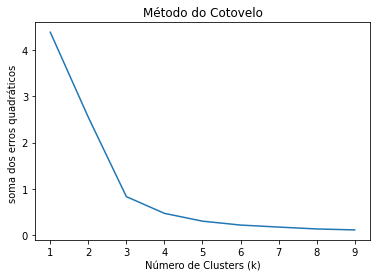

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Defina o intervalo de valores k
k_range = range(1, 10)

# Execute o algoritmo de clustering para cada valor k e armazene a soma dos erros quadráticos em uma lista
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Trace a curva de cotovelo
plt.plot(k_range, sse)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('soma dos erros quadráticos ')
plt.title('Método do Cotovelo')
plt.show()

Analisando o gráfico a cima, podemos identificar que a quantidade ideal de clusters é cerca de 3, 4 ou 5

In [ ]:
# Define quantos clusters queremos identificar (no caso 6)
# O random_state permite executar os cálculos da forma mais semelhante possível
kmeans = KMeans(n_clusters=4, random_state=42)

# Treina o modelo
kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [ ]:
kmeans.labels_.max()

3

In [ ]:
kmeans.labels_.min()

0

Desnormalizar os dados, apenas aplica a operação inversa da normalização

- **normalização:** (valor - valor_minimo) / (valor_maximo - valor_minimo) = valor_normalizado

- **desnormalização:** ((valor_maximo - valor_minimo) * valor_normalizado) + valor_minimo

In [ ]:
X = ((df[['quantidade','valor']].max() - df[['quantidade','valor']].min()) * X) + df[['quantidade','valor']].min()

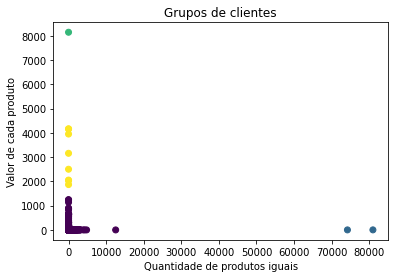

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_)
plt.xlabel('Quantidade de produtos iguais')
plt.ylabel('Valor de cada produto')
plt.title('Grupos de clientes')
plt.show()

O que podemos inferir deste gráfico?

# Diferenças entre associação e agrupamento
Associação e agrupamento são dois conceitos importantes em mineração de dados, e embora estejam relacionados à descoberta de padrões em conjuntos de dados, eles são diferentes em suas abordagens e objetivos.

``Agrupamento`` refere-se ao processo de dividir um conjunto de dados em grupos ou clusters, com base em suas características e semelhanças. O objetivo do agrupamento é encontrar grupos de objetos que sejam semelhantes uns aos outros e diferentes dos outros grupos. O agrupamento é uma técnica de aprendizado não supervisionado, o que significa que o algoritmo não recebe nenhum tipo de rótulo ou classe para orientar a formação dos grupos.

Por outro lado, a ``associação`` refere-se ao processo de descobrir relações entre os itens de um conjunto de dados. A associação é usada para encontrar padrões frequentes, que são combinações de itens que ocorrem juntos com uma frequência acima de um limite mínimo estabelecido. A associação é uma técnica de aprendizado não supervisionado, o que significa que o algoritmo não recebe nenhuma informação sobre as classes dos itens, mas apenas os identifica com base em suas características.

### Quando usar cada técnica:
A escolha da técnica de mineração de dados a ser usada depende dos objetivos do projeto e das características do conjunto de dados. A seguir, apresento alguns casos de uso típicos para cada técnica:

``Agrupamento``:

- Segmentação de clientes em grupos com base em seus comportamentos de compra, para direcionar campanhas de marketing específicas para cada grupo;

- Identificação de grupos de produtos com base em suas características, para melhorar o gerenciamento de estoque;

- Agrupamento de notícias ou artigos em categorias para criar uma navegação mais intuitiva em sites de notícias.


``Associação``:

- Análise de cestas de compras para identificar produtos que são frequentemente comprados juntos, para aprimorar a estratégia de precificação e promoções;

- Análise de dados de cliques em sites para identificar páginas que são frequentemente visitadas juntas, para melhorar a usabilidade do site;

- Análise de transações financeiras para identificar padrões de gastos fraudulentos.

Em resumo, enquanto o agrupamento é usado para encontrar grupos semelhantes de objetos em um conjunto de dados, a associação é usada para descobrir relações frequentes entre os itens de um conjunto de dados. Ambos são importantes na mineração de dados e têm várias aplicações em áreas como marketing, finanças e ciência da computação.

`Sugestões de leitura:`
Aqui estão algumas referências bibliográficas e sugestões de leitura sobre mineração de dados e as técnicas de agrupamento e associação:

- Han, J., Kamber, M., & Pei, J. (2011). Data mining: concepts and techniques (3rd ed.). Morgan Kaufmann Publishers.

- Tan, P. N., Steinbach, M., & Kumar, V. (2006). Introduction to data mining. Addison-Wesley.

- Jain, A. K. (2010). Data clustering: 50 years beyond K-means. Pattern Recognition Letters, 31(8), 651-666.

- Joly, A., Tamine, L., & Vodislav, D. (2017). Association rule mining: A recent overview. Knowledge Engineering Review, 32(3), e5.

- Wang, J., & Han, J. (2013). Mining high utility itemsets. Data Mining and Knowledge Discovery, 27(2), 264-299.

- Agrawal, R., Imieliński, T., & Swami, A. (1993). Mining association rules between sets of items in large databases. ACM SIGMOD Record, 22(2), 207-216.

Esses livros e artigos oferecem uma visão geral dos conceitos de mineração de dados, bem como técnicas específicas de agrupamento e associação. Eles também podem fornecer uma base teórica sólida para quem deseja aprofundar seus conhecimentos na área.

# Revisão básica de python

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np

In [ ]:
# Leitura da base de dados

# Repare que chamamos o pandas por meio do pd
# em seguida utilizamos a função read_csv para
# especificar qual o arquivo desejamos que seja lido pelo pandas
df = pd.read_csv('banco.csv')

In [ ]:
# Exibir as 5 primeiras e 5 últimas linhas
df

,idade,emprego,estado_civil,educacao,saldo_bancario,possui_casa,emprestimo,dia,mes,duracao,qtd_contato,deposito
0,59.0,admin.,NaN,secondary,2343,yes,no,5,may,1042.0,1.0,yes
1,56.0,admin.,NaN,secondary,45,no,no,5,may,1467.0,1.0,yes
2,41.0,technician,NaN,secondary,1270,yes,no,5,may,1389.0,1.0,yes
3,55.0,services,NaN,secondary,2476,yes,no,5,may,579.0,1.0,yes
4,54.0,admin.,NaN,tertiary,184,no,no,5,may,673.0,2.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,blue-collar,NaN,primary,1,yes,no,20,apr,257.0,1.0,no
11158,39.0,services,NaN,secondary,733,no,no,16,jun,NaN,4.0,no
11159,32.0,technician,NaN,secondary,29,no,no,19,aug,156.0,2.0,no
11160,43.0,technician,NaN,secondary,0,no,yes,8,may,9.0,2.0,no


In [ ]:
# Exibir as primeiras 5 linhas
df.head()

,idade,emprego,estado_civil,educacao,saldo_bancario,possui_casa,emprestimo,dia,mes,duracao,qtd_contato,deposito
0,59.0,admin.,NaN,secondary,2343,yes,no,5,may,1042.0,1.0,yes
1,56.0,admin.,NaN,secondary,45,no,no,5,may,1467.0,1.0,yes
2,41.0,technician,NaN,secondary,1270,yes,no,5,may,1389.0,1.0,yes
3,55.0,services,NaN,secondary,2476,yes,no,5,may,579.0,1.0,yes
4,54.0,admin.,NaN,tertiary,184,no,no,5,may,673.0,2.0,yes


In [ ]:
# Exibir as primeiras 2 linhas
df.head(2)

,idade,emprego,estado_civil,educacao,saldo_bancario,possui_casa,emprestimo,dia,mes,duracao,qtd_contato,deposito
0,59.0,admin.,NaN,secondary,2343,yes,no,5,may,1042.0,1.0,yes
1,56.0,admin.,NaN,secondary,45,no,no,5,may,1467.0,1.0,yes


In [ ]:
# Exibir as 2 últimas Linhas
df.tail(2)

,idade,emprego,estado_civil,educacao,saldo_bancario,possui_casa,emprestimo,dia,mes,duracao,qtd_contato,deposito
11160,43.0,technician,NaN,secondary,0,no,yes,8,may,9.0,2.0,no
11161,34.0,technician,NaN,secondary,0,no,no,9,jul,628.0,1.0,no


In [ ]:
# Exibe informações das colunas numéricas
df.describe()

,idade,saldo_bancario,dia,duracao,qtd_contato
count,11143.000000,11162.000000,11162.000000,10111.000000,11034.000000
mean,41.150767,1528.538524,15.658036,400.738799,2.444716
std,11.759461,3225.413326,8.420740,352.470409,2.672403
min,18.000000,-6847.000000,1.000000,2.000000,1.000000
25%,32.000000,122.000000,8.000000,166.000000,1.000000
50%,39.000000,550.000000,15.000000,283.000000,2.000000
75%,49.000000,1708.000000,22.000000,535.000000,3.000000
max,85.000000,81204.000000,31.000000,3881.000000,63.000000


In [ ]:
# Exibe uma descrição das colunas do tipo object
df.describe(include = "O")
# A primeira descrição 'count' é a quantidade de valores não nulos
# A segunda descrição 'unique' informa quantos valores únicos existem nas colunas
# A terceira descrição 'top' informa qual o valor que mais aparece na coluna
# A quarta descrição 'freq' é em relação à frequência (quantidade de vezes) que o valor top aparece na coluna

,emprego,estado_civil,educacao,possui_casa,emprestimo,mes,deposito
count,11162,1293,11162,11162,11162,11162,11162
unique,12,1,4,2,2,12,2
top,management,divorced,secondary,no,no,may,no
freq,2566,1293,5476,5881,9702,2824,5873


In [ ]:
df.info()
# Repare que existem algumas linhas com valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   idade           11143 non-null  float64
 1   emprego         11162 non-null  object 
 2   estado_civil    1293 non-null   object 
 3   educacao        11162 non-null  object 
 4   saldo_bancario  11162 non-null  int64  
 5   possui_casa     11162 non-null  object 
 6   emprestimo      11162 non-null  object 
 7   dia             11162 non-null  int64  
 8   mes             11162 non-null  object 
 9   duracao         10111 non-null  float64
 10  qtd_contato     11034 non-null  float64
 11  deposito        11162 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 1.0+ MB


In [ ]:
# Quantidade de valores nulos por coluna
df.isnull().sum()

idade               19
emprego              0
estado_civil      9869
educacao             0
saldo_bancario       0
possui_casa          0
emprestimo           0
dia                  0
mes                  0
duracao           1051
qtd_contato        128
deposito             0
dtype: int64

Verificar quantos valores nulos cada coluna possui é interessante, mas talvez verificar a porcentagem de valores nulos por coluna seja melhor para entender os valores nulos

In [ ]:
# Porcentagem de valores nulos por coluna
# Abaixo é realizada uma regra de 3 onde
# a quantidade de valores nulos é dividida pela
# quantidade de linhas do dataframe e multiplicado por 100
# Resultando na porcentagem de valores nulos por coluna
# Após a regra de 3, é utilizado a função round para exibir
# 4 casas decimais
round(df.isnull().sum() / len(df) * 100, 4)

idade              0.1702
emprego            0.0000
estado_civil      88.4161
educacao           0.0000
saldo_bancario     0.0000
possui_casa        0.0000
emprestimo         0.0000
dia                0.0000
mes                0.0000
duracao            9.4159
qtd_contato        1.1467
deposito           0.0000
dtype: float64

In [ ]:
# Para verificar a quantidade de valores únicos na coluna emprego
df.emprego.nunique()

12

In [ ]:
# Para verificar a os valores únicos na coluna emprego
df.estado_civil.unique()
# No python, quando um valor é nulo é representado por
# NaN (Abreviação de Not a Number)

array([nan, 'divorced'], dtype=object)

In [ ]:
# Para verificar a os valores únicos na coluna emprego e a quantidade de aparições de cada valor
df.emprego.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: emprego, dtype: int64

In [ ]:
# Verificar o tamanho do dataframe (Tabela)
df.shape

(11162, 12)

In [ ]:
# quantidade de linhas
df.shape[0]

11162

In [ ]:
# Existe outro método de verificar a quantidade de linhas do dataframe
# é o mesmo método para verificar o tamanho de uma lista
len(df)

11162

In [ ]:
# quantidade de colunas
df.shape[1]

12

In [ ]:
# Listar as colunas do dataframe
df.columns

Index(['idade', 'emprego', 'estado_civil', 'educacao', 'saldo_bancario',
       'possui_casa', 'emprestimo', 'dia', 'mes', 'duracao', 'qtd_contato',
       'deposito'],
      dtype='object')

## Selecionar linhas com o loc

Assim como o iloc, nós podemos selecionar linhas com o loc, mas seu funcionamento não se da pelo index. No Loc, nós definimos para selecionar todos os registros que estejam de acordo com um determinado valor, em uma determinada coluna, ou seja, por exemplo, podemos selecionar todos os registros que possuemque possuem idade igual a 37

Para usar o loc, utilizamos a seguinte sintaxe:
* `df.loc[df['nome_da_coluna'] == valor_desejado]`

In [ ]:
# Selecionar todos os registros com iade igual a 37
df.loc[df['idade'] == 37]

,idade,emprego,estado_civil,educacao,saldo_bancario,possui_casa,emprestimo,dia,mes,duracao,qtd_contato,deposito
8,37.0,technician,NaN,secondary,1,yes,no,6,may,608.0,1.0,yes
24,37.0,unemployed,NaN,secondary,381,yes,no,8,may,985.0,2.0,yes
81,37.0,services,divorced,secondary,49,yes,no,16,may,619.0,2.0,yes
89,37.0,management,NaN,secondary,792,yes,no,16,may,1187.0,4.0,yes
95,37.0,management,divorced,tertiary,122,yes,no,19,may,1622.0,2.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
11074,37.0,management,NaN,tertiary,21,no,no,21,aug,50.0,12.0,no
11082,37.0,management,NaN,tertiary,1449,no,no,3,jun,291.0,1.0,no
11112,37.0,technician,NaN,secondary,95,no,no,6,feb,454.0,3.0,no
11116,37.0,entrepreneur,NaN,tertiary,555,no,no,7,jul,NaN,2.0,no


Assim como vimos anteriormente, podemos usar a função .shape[0] para receber quantos registros existem para o determinado filtro

In [ ]:
# Selecionar a quantidade de registros com iade igual a 37
df.loc[df['idade'] == 37].shape[0]

370

Também podemos usar a função loc com os valores textuais

In [ ]:
# Selecionar todos os registros com o estado civil divorciado
df.loc[df['estado_civil'] == 'divorced']

,idade,emprego,estado_civil,educacao,saldo_bancario,possui_casa,emprestimo,dia,mes,duracao,qtd_contato,deposito
7,60.0,retired,divorced,secondary,545,yes,no,6,may,1030.0,1.0,yes
15,35.0,management,divorced,tertiary,3837,yes,no,8,may,1084.0,1.0,yes
19,49.0,admin.,divorced,secondary,168,yes,yes,8,may,513.0,1.0,yes
20,28.0,admin.,divorced,secondary,785,yes,no,8,may,442.0,2.0,yes
22,43.0,management,divorced,tertiary,388,yes,no,8,may,2087.0,2.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
11135,36.0,services,divorced,secondary,115,no,no,6,jun,201.0,1.0,no
11140,55.0,services,divorced,secondary,2166,yes,no,28,may,23.0,17.0,no
11142,52.0,admin.,divorced,secondary,48,no,yes,17,nov,591.0,1.0,no
11143,38.0,unemployed,divorced,secondary,189,yes,yes,21,jul,NaN,2.0,no


Podemos usar mais filtros com o loc com a seguinte sintaxe:
* `df.loc[(df['nome_da_coluna'] == valor_desejado) & (df['nome_da_coluna_2'] == valor_desejado_2)]`

In [ ]:
# Exibe as pessoas divorciadas com 25 anos
df.loc[(df['idade'] == 25) & (df['estado_civil'] == 'divorced')]

,idade,emprego,estado_civil,educacao,saldo_bancario,possui_casa,emprestimo,dia,mes,duracao,qtd_contato,deposito
8514,25.0,services,divorced,secondary,1694,no,no,7,jul,159.0,2.0,no
10435,25.0,technician,divorced,secondary,86,no,yes,8,jul,483.0,2.0,no


In [ ]:
# Exibe as pessoas divorciadas com 35 anos e que são gerentes
df.loc[(df['idade'] == 35) & (df['emprego'] == 'management') & (df['estado_civil'] == 'divorced')]

,idade,emprego,estado_civil,educacao,saldo_bancario,possui_casa,emprestimo,dia,mes,duracao,qtd_contato,deposito
15,35.0,management,divorced,tertiary,3837,yes,no,8,may,1084.0,1.0,yes
688,35.0,management,divorced,tertiary,146,no,no,6,aug,720.0,2.0,yes
910,35.0,management,divorced,tertiary,0,yes,no,29,oct,171.0,1.0,yes
974,35.0,management,divorced,tertiary,859,yes,yes,19,nov,1554.0,1.0,yes
1005,35.0,management,divorced,tertiary,141,no,yes,20,nov,728.0,1.0,yes
1494,35.0,management,divorced,tertiary,26,no,no,16,apr,NaN,2.0,yes
3890,35.0,management,divorced,tertiary,2885,no,no,13,aug,199.0,3.0,yes
4613,35.0,management,divorced,tertiary,1723,yes,no,25,jul,862.0,1.0,yes
4799,35.0,management,divorced,tertiary,434,yes,no,13,aug,1314.0,2.0,yes
4984,35.0,management,divorced,tertiary,6997,yes,no,9,jul,1121.0,1.0,yes


# Outra funcionalidade da função loc

Com o loc, podemos passar mais alguns parâmetros, permitindo mudar valores nas linhas em que o filtro selecionou. Veja o exemplo para ficar mais claro para `Alterar os valores da coluna estado_civil`

In [ ]:
# Primeiro, vamos verificar quais são os valores únicos da coluna emprego
df.emprego.unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [ ]:
# Seleciona todos os registros com o valor retired em emprego
df.loc[df['emprego'] == 'retired']

,idade,emprego,estado_civil,educacao,saldo_bancario,possui_casa,emprestimo,dia,mes,duracao,qtd_contato,deposito
7,60.0,retired,divorced,secondary,545,yes,no,6,may,1030.0,1.0,yes
52,59.0,retired,NaN,secondary,1521,yes,yes,14,may,1125.0,2.0,yes
57,60.0,retired,NaN,primary,1542,yes,no,14,may,930.0,1.0,yes
72,41.0,retired,divorced,primary,-233,yes,no,15,may,1156.0,2.0,yes
119,34.0,retired,NaN,primary,4499,no,no,21,may,1681.0,1.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
11110,35.0,retired,NaN,primary,434,no,no,5,may,138.0,1.0,no
11124,42.0,retired,NaN,primary,0,yes,no,8,may,186.0,2.0,no
11137,49.0,retired,NaN,unknown,247,no,no,15,may,213.0,2.0,no
11144,60.0,retired,NaN,secondary,0,yes,no,15,may,229.0,1.0,no


In [ ]:
# após realizar o filtro selecionando os registros que possuem o valor 'married'
# Colocamos uma vírgula e selecionamos qual coluna desejamos realizar a alteração
# Neste caso selecionamos a própria coluna estado_civil, mas poderia ser qualquer
# outra coluna.
# Após definir a coluna, fechamos o colchetes e, com o sinal de igual, definimos
# Qual será o novo valor para a coluna estado_civil onde os registros eram 'married'
df.loc[df['emprego'] == 'retired','emprego'] = 'Aposentado'

In [ ]:
# Verificando novamente os valores presentes na coluna estado_civil
# Repare que não existe mais o valor married, pois todos os registros
# Que possuiam este valor foram alterados para 'Casado'
df.emprego.unique()

array(['admin.', 'technician', 'services', 'management', 'Aposentado',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

## Valores nulos
Voltando a falar de valores nulos, nas colunas em que existem valores nulos, existem algumas observações a serem feitas:
* Qual o tipo de dados da coluna
* O que a coluna representa
* Qual a porcentagem de dados nulos

In [ ]:
# Porcentagem de valores nulos por coluna
round(df.isnull().sum() / len(df) * 100, 4)

idade              0.1702
emprego            0.0000
estado_civil      88.4161
educacao           0.0000
saldo_bancario     0.0000
possui_casa        0.0000
emprestimo         0.0000
dia                0.0000
mes                0.0000
duracao            9.4159
qtd_contato        1.1467
deposito           0.0000
dtype: float64

Na base de dados, existem 4 colunas com alguns valores nulos.
Destas, as colunas com valores numéricos são:
* idade;
* duracão;
* qtd_contato.

E a coluna estado_civil é do tipo textual

Nas colunas com tipo de dados numéricos, podemos utilizar 3 abordagens:
* 1 - Se forem poucos dados nulos, apagar os registros com estes dados;
* 2 - Se for uma quantidade considerável de dados podemos:
    * 2.1 - Substituir os valores nulos pela média da coluna;
    * 2.1 - Substituir os valores nulos pela mediana da coluna;
    * 2.1 - Substituir os valores nulos pela moda da coluna.
* 3 - Se forem muitos dados nulos, apagar a coluna.

Nas colunas com tipo de dados textual, podemos utilizar 3 abordagens:
* 1 - Se forem poucos dados nulos, apagar os registros com estes dados;
* 2 - Se for uma quantidade considerável de dados podemos substituir os valores nulos pela moda da coluna;
* 3 - Se forem muitos dados nulos, apagar a coluna.

O que é média, mediana e moda:
* Média - é a soma de todos os valores, dividido pela quantidade de valores somados
* Mediana - considerando a lista de valores em ordem crescente, é o valor central da lista
* Moda - é o valor que mais aparece na coluna

Para fazer as alterações nos valores nulos podemos usar a função loc, se for alterar os valores, ou drop se for apagar a coluna.
No caso da função loc, não utilizamos um sinal de igualdade para verificar os valores nulos e sim, usamos o .isnull()

### Coluna numérica abordagem 1 - Apagar as linhas.
Como na coluna idade não temos nem 0,2% de registros nulos, é aceitável que se exclua tais registros (Poderíamos utilizar os outros métodos também)

In [ ]:
# Exibe todos os registros com valores nulos na coluna idade
df.loc[df['idade'].isnull()]

,idade,emprego,estado_civil,educacao,saldo_bancario,possui_casa,emprestimo,dia,mes,duracao,qtd_contato,deposito
1243,NaN,Aposentado,divorced,secondary,1,no,no,13,feb,152.0,3.0,yes
1582,NaN,Aposentado,divorced,primary,2282,no,no,21,apr,207.0,17.0,yes
2598,NaN,Aposentado,divorced,primary,0,no,no,26,aug,189.0,1.0,yes
2793,NaN,Aposentado,divorced,primary,6746,no,no,21,oct,749.0,1.0,yes
2802,NaN,Aposentado,NaN,unknown,775,no,no,22,oct,313.0,3.0,yes
2865,NaN,Aposentado,NaN,primary,230,no,no,30,oct,144.0,1.0,yes
3002,NaN,Aposentado,NaN,secondary,614,no,no,9,dec,595.0,1.0,yes
3067,NaN,Aposentado,NaN,primary,2190,no,no,12,jan,512.0,2.0,yes
3098,NaN,Aposentado,NaN,unknown,775,no,no,26,jan,164.0,4.0,yes
3292,NaN,Aposentado,divorced,primary,712,no,no,3,mar,557.0,1.0,yes


In [ ]:
# Retornamos uma lista com o index de todos os
# registros onde a idade é nula
df.loc[df['idade'].isnull()].index

Int64Index([ 1243,  1582,  2598,  2793,  2802,  2865,  3002,  3067,  3098,
             3292,  3381,  3716,  3756,  3822,  5521,  8167,  9430, 10562,
            10843],
           dtype='int64')

In [ ]:
# Ao executar o código abaixo foram removidos todos os registros
# Que possuíam a idade nula
df.drop(df.loc[df['idade'].isnull()].index, inplace=True)

In [ ]:
# Exibe todos os registros com valores nulos na coluna idade
df.loc[df['idade'].isnull()]

,idade,emprego,estado_civil,educacao,saldo_bancario,possui_casa,emprestimo,dia,mes,duracao,qtd_contato,deposito


In [ ]:
# Porcentagem de valores nulos por coluna
round(df.isnull().sum() / len(df) * 100, 4)

idade              0.0000
emprego            0.0000
estado_civil      88.4501
educacao           0.0000
saldo_bancario     0.0000
possui_casa        0.0000
emprestimo         0.0000
dia                0.0000
mes                0.0000
duracao            9.4319
qtd_contato        1.1487
deposito           0.0000
dtype: float64

### Coluna numérica abordagem 2 - substituir valores nulos por média, mediana ou moda

In [ ]:
media = df.duracao.mean()
mediana = df.duracao.median()
print(f'Média da coluna duração {media}')
print(f'Mediana da coluna duração {mediana}')

Média da coluna duração 400.6484344034879
Mediana da coluna duração 283.0


Importante notar que, a média, geralmente será um valor com casas decimais e, a depender da coluna, devemos remover as casas decimais com a função round.

Por exemplo, a coluna duracao representa quantos dias o cliente tem conta no banco, então não podemos ter que o cliente possui conta há 400.64843 dias...

In [ ]:
# Retorna a média arredondada sem casas decimais da coluna
round(df['duracao'].mean())

401

In [ ]:
# Exibe todos os registros com valores nulos na coluna duracao
df.loc[df['duracao'].isnull()]

,idade,emprego,estado_civil,educacao,saldo_bancario,possui_casa,emprestimo,dia,mes,duracao,qtd_contato,deposito
838,55.0,blue-collar,NaN,secondary,196,no,no,21,aug,NaN,1.0,yes
897,44.0,admin.,divorced,primary,429,yes,no,23,oct,NaN,1.0,yes
900,40.0,technician,divorced,tertiary,568,yes,no,24,oct,NaN,1.0,yes
901,49.0,admin.,NaN,secondary,10250,yes,no,24,oct,NaN,1.0,yes
933,34.0,admin.,NaN,tertiary,899,yes,no,12,nov,NaN,1.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
11136,31.0,management,NaN,tertiary,0,yes,no,8,sep,NaN,1.0,no
11143,38.0,unemployed,divorced,secondary,189,yes,yes,21,jul,NaN,2.0,no
11148,32.0,blue-collar,NaN,secondary,1,yes,no,8,may,NaN,1.0,no
11154,52.0,technician,NaN,tertiary,523,yes,yes,8,jul,NaN,1.0,no


In [ ]:
# Altera todos os registros com valores núlos da coluna duração para a média arredondada da coluna
df.loc[df['duracao'].isnull(), 'duracao'] = round(df['duracao'].mean())

In [ ]:
# Exibe todos os registros com valores nulos na coluna duracao
df.loc[df['duracao'].isnull()]

,idade,emprego,estado_civil,educacao,saldo_bancario,possui_casa,emprestimo,dia,mes,duracao,qtd_contato,deposito


In [ ]:
# Porcentagem de valores nulos por coluna
round(df.isnull().sum() / len(df) * 100, 4)

idade              0.0000
emprego            0.0000
estado_civil      88.4501
educacao           0.0000
saldo_bancario     0.0000
possui_casa        0.0000
emprestimo         0.0000
dia                0.0000
mes                0.0000
duracao            0.0000
qtd_contato        1.1487
deposito           0.0000
dtype: float64

### Coluna de valores textuais
Na coluna estado_civil temos quase 90% de dados nulos, o melhor que podemos fazer é apagar a coluna, mas, se fossem poucos dados núlos, poderíamos excluir somente as linhas com valores nulos nesta coluna e, ou usar a moda para atribuir o valor que mais aparece na coluna aos valores nulos

In [ ]:
# Apenas para exibir a moda da coluna textual,
# mas não iremos utilizá-la
df.estado_civil.mode()[0]

In [ ]:
# Desta forma apenas exibimos a tabela sem a coluna estado_civil
# Devido ao parâmetro inplace ser False
df.drop('estado_civil', inplace=False, axis=1)

In [ ]:
df

In [ ]:
# Desta forma apagamos definitivamente a coluna estado_civil
df.drop('estado_civil', inplace=True, axis=1)

In [ ]:
# Porcentagem de valores nulos por coluna
# Repare que não temos mais a coluna estado_civil
# E também temos todas as colunas sem valores nulos
round(df.isnull().sum() / len(df) * 100, 4)

# Salvar alterações

Diferente de uma planilha excel que nós abrimos o arquivo, editamos e salvamos o mesmo arquivo, no python toda alteração realizada na tabela não será salva até que utilize o comando para salvar as alterações.

Para o comando que salva as alterações, é necessário definir um nome para o arquivo. Podemos definir o nome igual ao do arquivo original, o que acarretaria em substituir o arquivo original pelo arquivo alterado, então, por padrão, definimos um nome diferente do original e intuitivo.

Outro ponto importante, por padrão, ao salvar a DataFrame alterado, será criada uma coluna com o index dos registros. Para evitar que isto aconteça, é necessário que chame o parâmetro `index e selecione False`.

In [ ]:
df.to_csv('banco_alterado_sem_dados_nulos.csv', index = False)